# Analysis of Leader Election and Rotation Strategies in BFT Protocols

This notebook initially aimed to analyze the performance impact of a leader failure. However, the experimental data shows no significant drop in throughput or spike in latency around the 30-second mark where the failure was intended to occur. This suggests the leader failure was not successfully triggered during the experiment.

The analysis has been updated to visually compare the performance of the 'failure' run against the 'no-failure' baseline. A vertical line at 30 seconds marks the point where the failure was supposed to happen, highlighting the lack of any observable impact in the current dataset.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [23]:
# Load and Clean Data
csv_path = 'benchmark_csv/benchmarks.csv'

if not os.path.exists(csv_path):
    print(f"Error: CSV file not found at '{csv_path}'")
else:
    df = pd.read_csv(csv_path)
    print("Benchmark data loaded successfully.")

    # --- Data Cleaning ---
    # Filter out the long tail of zero-throughput data points.
    cleaned_df = df[df['throughput'] > 0].copy()
    print(f"Cleaned data contains {len(cleaned_df)} rows (where throughput > 0).")

Benchmark data loaded successfully.
Cleaned data contains 280 rows (where throughput > 0).


In [24]:
def plot_leader_failure_comparison(protocol_name, df, failure_start_time=30):
    """
    Visually compares the performance of a failure-test run against a baseline.

    Args:
        protocol_name (str): The base name of the protocol (e.g., 'pbft').
        df (pd.DataFrame): The complete dataframe containing all benchmark data.
        failure_start_time (int): The time in seconds when the failure was intended to occur.
    """
    
    vc_protocol = protocol_name
    novc_protocol = f"{protocol_name}-no-vc"
    
    vc_df = df[df['protocol'] == vc_protocol]
    novc_df = df[df['protocol'] == novc_protocol]
    
    if vc_df.empty:
        print(f"No data found for '{vc_protocol}' experiment.")
        return
    if novc_df.empty:
        print(f"No baseline data found for '{novc_protocol}'.")
        # We can still plot the failure data on its own
    
    print(f"[{protocol_name.upper()}] Plotting comparison. No performance drop was detected at {failure_start_time}s.")

    # --- Plotting ---
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), sharex=True)
    fig.suptitle(f'Leader Failure Impact Analysis: {protocol_name.upper()}', fontsize=16)

    # Throughput Plot
    ax1.plot(novc_df['timestamp'], novc_df['throughput'], label=f'{novc_protocol} (Baseline)', color='grey', linestyle='--')
    ax1.plot(vc_df['timestamp'], vc_df['throughput'], label=f'{vc_protocol} (Failure Test)', color='blue', marker='.')
    ax1.axvline(x=failure_start_time, color='red', linestyle=':', label=f'Intended Failure Time ({failure_start_time}s)')
    ax1.set_title('Throughput Comparison')
    ax1.set_ylabel('Throughput (req/s)')
    ax1.legend()
    ax1.grid(True)

    # Latency Plot
    ax2.plot(novc_df['timestamp'], novc_df['latency_avg_s'], label=f'{novc_protocol} (Baseline)', color='grey', linestyle='--')
    ax2.plot(vc_df['timestamp'], vc_df['latency_avg_s'], label=f'{vc_protocol} (Failure Test)', color='red', marker='.')
    ax2.axvline(x=failure_start_time, color='red', linestyle=':', label=f'Intended Failure Time ({failure_start_time}s)')
    ax2.set_title('Client Latency Comparison')
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Average Latency (s)')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

[PBFT] Plotting comparison. No performance drop was detected at 30s.


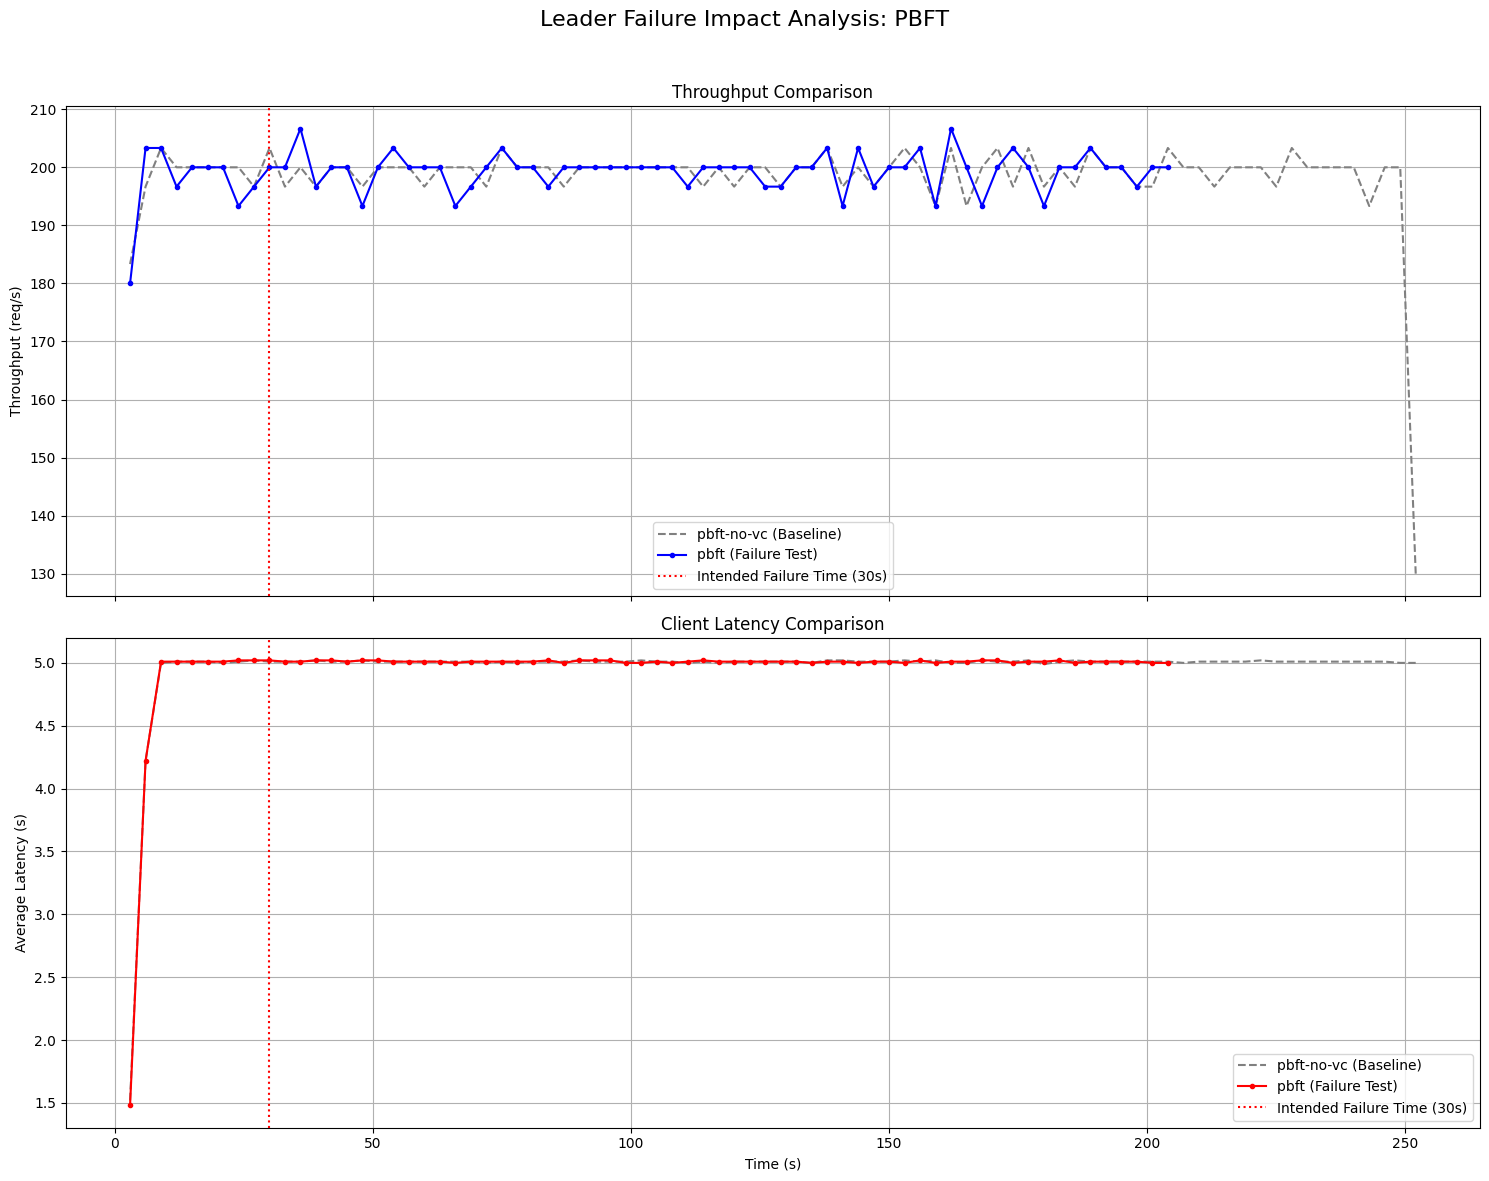

In [25]:
plot_leader_failure_comparison('pbft', cleaned_df, failure_start_time=30)

[SBFT] Plotting comparison. No performance drop was detected at 30s.


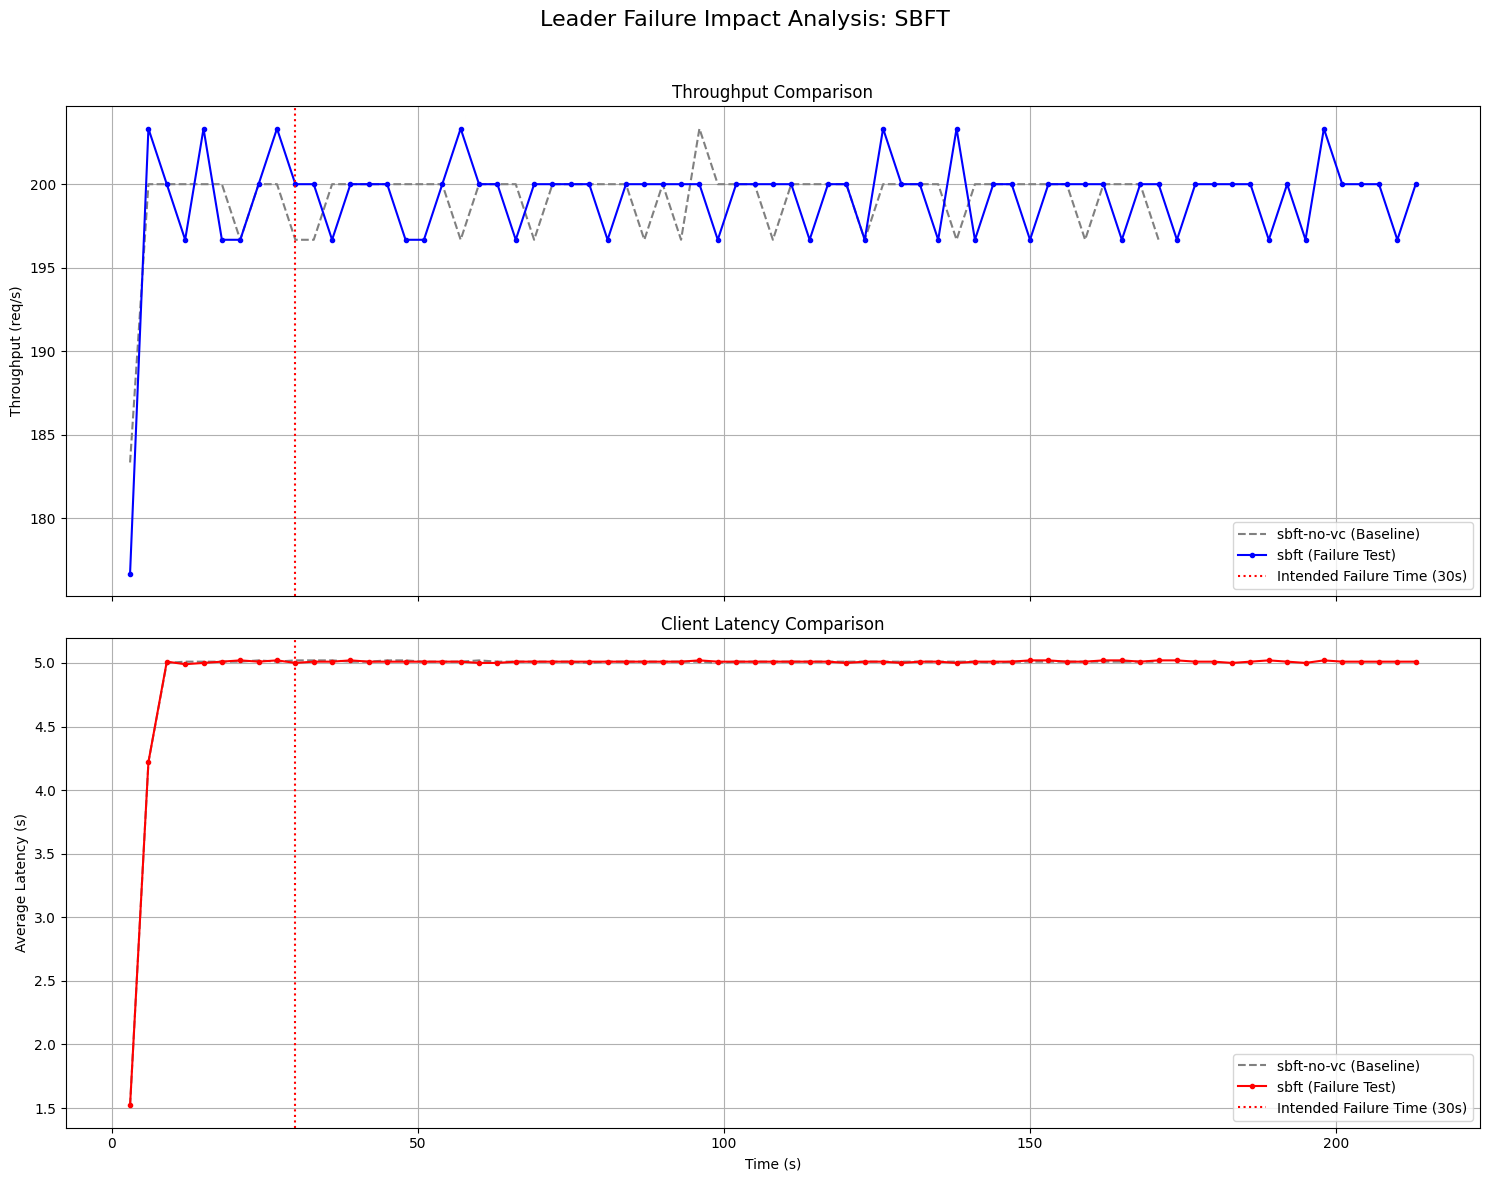

In [26]:
plot_leader_failure_comparison('sbft', cleaned_df, failure_start_time=30)